# US accident analysis

In [1]:
import pandas  as pd

In [3]:
import numpy

In [4]:
## data download

df = pd.read_csv("US_Accidents_March23.csv")

In [5]:
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [6]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
len(df.columns)

46

In [8]:
# gives the total number of rows
len(df)

7728394

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [10]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [11]:
# number of nummerical columns

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics) 
len(numeric_df.columns)

13

percentage of missing values per column

In [12]:
#missing values?

# how to find missing values per columns using pandas?

#look for isnull()

#isna replaces value by true if the value is nul
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
Traffic_Signal           0.000000e+00
Roundabout               0.000000e+00
Station                  0.000000e+00
Stop                     0.000000e+00
Traffic_Calm

In [13]:
#remove the values in the series with zero missing values cuz 
# we dont need that 
# also helpful in neater plotting of graph
missing_percentages[missing_percentages != 0]

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
dtype: float64

series plotting-- whenever you have one entity and not the dataset and you need to plot it that is series plotting


series is simply one column from the dataframe


In [14]:
type(missing_percentages)

pandas.core.series.Series

<AxesSubplot:>

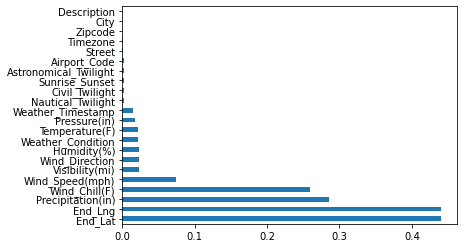

In [15]:
missing_percentages[missing_percentages != 0].plot(kind = 'barh')

if you see that something is missing alot of values, then it means that it is not gonna be that useful
so we can skip to chose it form the analysis


In [16]:
## exploratory analysis and visualization

In [17]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

let's pick the columns I want to analyze


1. city

2. start time

3. start lat, start lng

4. temperature

5. weather condition

## the City column 

In [18]:
df.City

0                Dayton
1          Reynoldsburg
2          Williamsburg
3                Dayton
4                Dayton
               ...     
7728389       Riverside
7728390       San Diego
7728391          Orange
7728392     Culver City
7728393        Highland
Name: City, Length: 7728394, dtype: object

### 1. How Many total distinct cities are their in the date?


In [19]:
cities = df.City.unique()
len(cities)

13679

In [20]:
cities_by_accident = df.City.value_counts()
cities_by_accident

Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: City, Length: 13678, dtype: int64

In [21]:
cities_by_accident[:20]

Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: City, dtype: int64

### 2. which city has most accidents?


<AxesSubplot:>

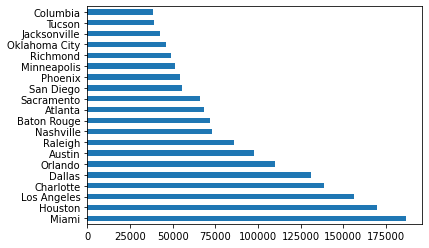

In [22]:
cities_by_accident[:20].plot(kind = 'barh')

In [23]:
import seaborn as sns
sns.set_style("darkgrid")

<AxesSubplot:xlabel='City', ylabel='Count'>

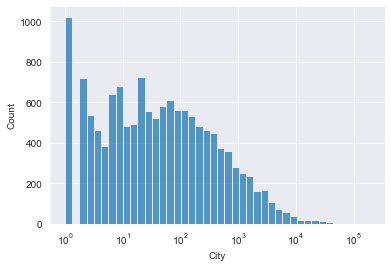

In [24]:
sns.histplot(cities_by_accident, log_scale= True)

# 0 to 100 accidetns is where most of the data falls

# many have 1 accident like more than 1000 cities rn

In [25]:
cities_by_accident[cities_by_accident == 1]

Lake Andes                      1
Catoctin                        1
Duck Hill                       1
Westbrookville                  1
Saint Croix                     1
                               ..
Benkelman                       1
Old Appleton                    1
Wildrose                        1
Mc Nabb                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1023, dtype: int64

In [26]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]

### 3. What percentage of cities have more than 1000 accidents? 

In [225]:
#less than 8% cities have more than 1000 accidents
(len(high_accident_cities) / len(cities)) * 100

8.904159660793917

### 4. What top 5 cities have most accidents?



In [223]:
high_accident_cities[:5]

Miami          186917
Houston        169609
Los Angeles    156491
Charlotte      138652
Dallas         130939
Name: City, dtype: int64

### 5. What top 5 cities have most accidents?

In [224]:
low_accident_cities[:5]

Coos Bay         998
Hobe Sound       996
Thousand Oaks    995
Polk City        994
Roosevelt        994
Name: City, dtype: int64

C:\Users\Khola Shams\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

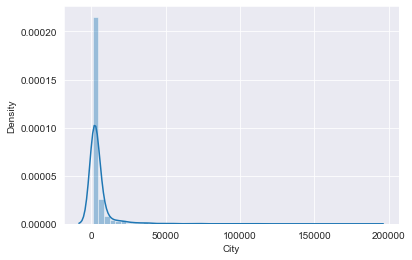

In [28]:
sns.distplot(high_accident_cities)

C:\Users\Khola Shams\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

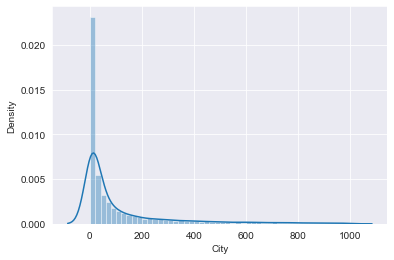

In [29]:
sns.distplot(low_accident_cities)

## States

In [219]:
df.State

0          OH
1          OH
2          OH
3          OH
4          OH
           ..
7728389    CA
7728390    CA
7728391    CA
7728392    CA
7728393    CA
Name: State, Length: 7728394, dtype: object

### 6. How many unique states are there in the data?


In [186]:
states = df.State.unique()
len(states)

49

In [212]:
#maximum_aaccidents_states = df.isna().sum().sort_values(ascending=False) / len(df)
#missing_percentages

min_accident_states = df.State.value_counts().sort_values(ascending=True)
min_accident_states

SD        289
VT        926
ME       2698
ND       3487
WY       3757
NH      10213
NM      10325
ID      11376
WV      13793
DE      14097
MS      15181
RI      16971
DC      18630
KS      20992
NV      21665
AR      22780
IA      26307
MT      28496
NE      28870
KY      32254
WI      34688
MA      61996
IN      67224
CT      71005
MO      77323
OK      83647
CO      90885
UT      97079
AL     101044
WA     108221
OH     118115
MD     140417
NJ     140719
LA     149701
MI     162191
TN     167388
IL     168958
GA     169234
AZ     170609
OR     179660
MN     192084
PA     296620
VA     303301
NC     338199
NY     347960
SC     382557
TX     582837
FL     880192
CA    1741433
Name: State, dtype: int64

### 7. Which 5 states have lowest Number of accidents?
### 8. Which state has lower number of accidents?

In [218]:
top_min_state_accidents = min_accident_states[:5]
top_min_state_accidents

SD     289
VT     926
ME    2698
ND    3487
WY    3757
Name: State, dtype: int64

the minimum number of accidents occured in the South Dakota with a number of 289 throughout

### 9. Which 5 states have highest Number of accidents?
### 10. Which state has highest number of accidents?

In [217]:
top_max_state_accidents =  max_accident_states[:5]
top_max_state_accidents

CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
Name: State, dtype: int64

the maximum number of accidents occured in the California with a number of 1741433 throughout

In [214]:
max_accident_states = df.State.value_counts().sort_values(ascending=False)
max_accident_states

CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
AZ     170609
GA     169234
IL     168958
TN     167388
MI     162191
LA     149701
NJ     140719
MD     140417
OH     118115
WA     108221
AL     101044
UT      97079
CO      90885
OK      83647
MO      77323
CT      71005
IN      67224
MA      61996
WI      34688
KY      32254
NE      28870
MT      28496
IA      26307
AR      22780
NV      21665
KS      20992
DC      18630
RI      16971
MS      15181
DE      14097
WV      13793
ID      11376
NM      10325
NH      10213
WY       3757
ND       3487
ME       2698
VT        926
SD        289
Name: State, dtype: int64

<AxesSubplot:>

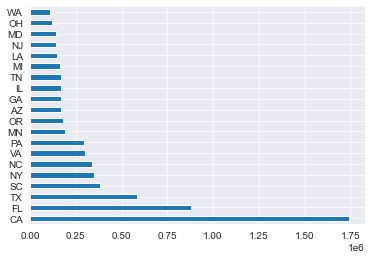

In [188]:
states_by_accident[:20].plot(kind = 'barh')

<AxesSubplot:xlabel='State', ylabel='Count'>

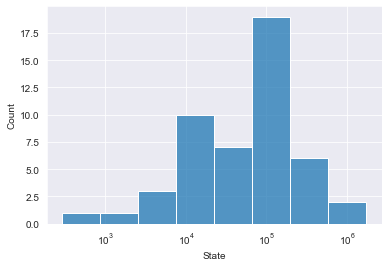

In [189]:
sns.histplot(states_by_accident, log_scale= True)

In [190]:
cities_by_accident[cities_by_accident == 1]

Lake Andes                      1
Catoctin                        1
Duck Hill                       1
Westbrookville                  1
Saint Croix                     1
                               ..
Benkelman                       1
Old Appleton                    1
Wildrose                        1
Mc Nabb                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1023, dtype: int64

### 11. What is the percentage of hishest and lowest accidents in the states with comparison to like lac accidents on average

In [201]:
high_accident_states = states_by_accident[states_by_accident >= 100000]
low_accident_states = states_by_accident[states_by_accident < 100000]

###  12. Which 5 states has the highest number of accidents?

In [226]:
high_accident_states[:5]

CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
Name: State, dtype: int64

In [202]:
len(high_accident_states) / len(states)

0.42857142857142855

###  13. Which 5 states has the lowest number of accidents?

In [227]:
low_accident_states[:5]

UT    97079
CO    90885
OK    83647
MO    77323
CT    71005
Name: State, dtype: int64

In [208]:
len(low_accident_states) / len(states)

0.5714285714285714

43% of the states have high accident rates i.e more than lac , still many states have less accidents occuring over the eyars according to the data

C:\Users\Khola Shams\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='State', ylabel='Density'>

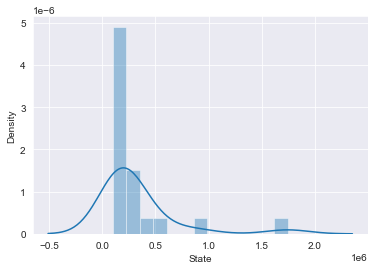

In [205]:
sns.distplot(high_accident_states)

C:\Users\Khola Shams\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='State', ylabel='Density'>

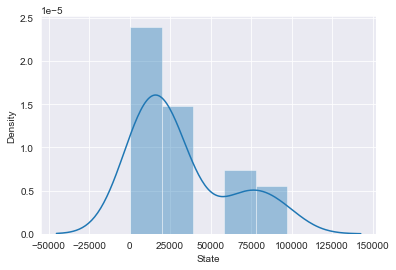

In [206]:
sns.distplot(low_accident_states)

## Start _Time column

In [30]:
df


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [31]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [32]:
df.Start_Time

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
7728389    2019-08-23 18:03:25
7728390    2019-08-23 19:11:30
7728391    2019-08-23 19:00:21
7728392    2019-08-23 19:00:21
7728393    2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: object

In [33]:
df.Start_Time[0]

'2016-02-08 05:46:00'

In [35]:
#converting this start time string to date

df.Start_Time = pd.to_datetime(df.Start_Time)

In [36]:
df.Start_Time[0]

Timestamp('2016-02-08 05:46:00')

### 14. At what time accidents occur the most?
### 15. At what time there are very few cances of accidents to occur?

<AxesSubplot:xlabel='Start_Time'>

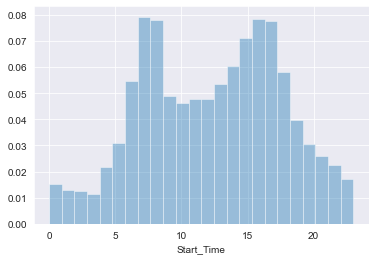

In [46]:
# we cant plot the time and date, so we will put out peieces of info and store
# it in some other variables and then use them for analyses

sns.distplot(df.Start_Time.dt.hour,bins = 24, kde = False, norm_hist = True)
 # it seems like most accidetns happend between 7 to 9 am

### 16. which days of the week have the most accidents?

1. A high percentage of accidents occur between 6am-10am and 15pm-18pm (probably people are in a hurry to get to work)

2. There are very few chances of accidents between 12 am and 4am

<AxesSubplot:xlabel='Start_Time'>

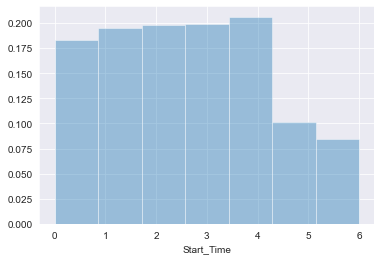

In [50]:
sns.distplot(df.Start_Time.dt.dayofweek,bins = 7, kde = False, norm_hist = True)


### 17. Is the distribution of accidents by hour the same on weekends  weekdays?

In [228]:


# get data for sunday only
#get indexes
sunday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]

<AxesSubplot:xlabel='Start_Time'>

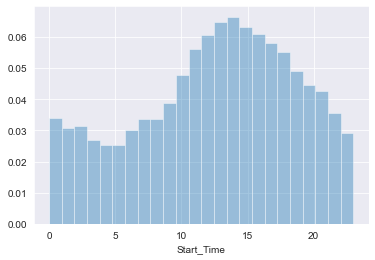

In [64]:
sns.distplot(sunday_start_time.dt.hour,bins = 24, kde = False, norm_hist = True)
# onsundays, its during the afternoon, accidetns occur

on sundays, the peak occurs between 10am and 3pm unlike weekdays



### 18. What time of the day are accidents most frequent in? 

### 19. Explain the month wise trend of accidents for mondays? 

In [66]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]

<AxesSubplot:xlabel='Start_Time'>

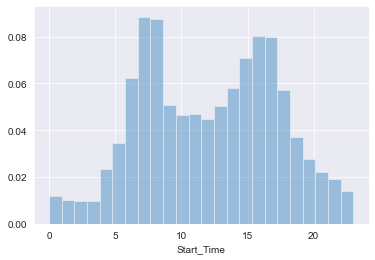

In [67]:
sns.distplot(monday_start_time.dt.hour,bins = 24, kde = False, norm_hist = True)
# on monday, the trend is different than sundays.

### 20. Explain the month wise trend of accidents? 

<AxesSubplot:xlabel='Start_Time'>

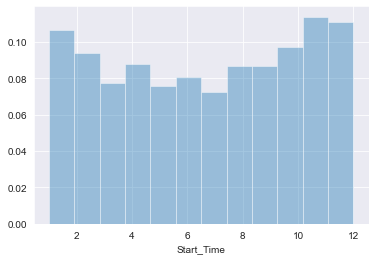

In [71]:
#month

sns.distplot(monday_start_time.dt.month,bins = 12, kde = False, norm_hist = True)



### 21. Are their more accidents in winter or summers? 
### 22. Which months have the most accidents? 

In [70]:
# around the summer, the accidents decrease

<AxesSubplot:xlabel='Start_Time'>

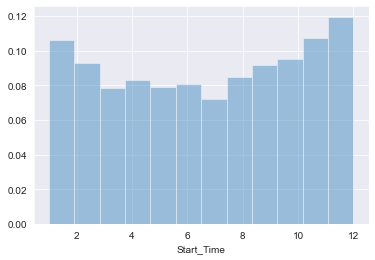

In [74]:
sns.distplot(df.Start_Time.dt.month,bins = 12, kde = False, norm_hist = True)



december has most accidents occuring year over year (probably cuz of winter, snow etc)
then november and january have second highest number of accidetns occuring year over year

this means that most accidetns occur in the winter

In [75]:
# year specific accident
df.Start_Time.dt.year

0          2016
1          2016
2          2016
3          2016
4          2016
           ... 
7728389    2019
7728390    2019
7728391    2019
7728392    2019
7728393    2019
Name: Start_Time, Length: 7728394, dtype: int64

### 23. what is the trends of the accidents year over year? (decreasing/increasing)

<AxesSubplot:ylabel='Frequency'>

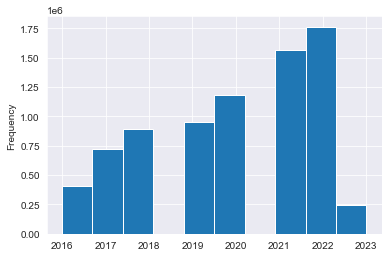

In [232]:
df.Start_Time.dt.year.plot(kind = 'hist')

### 24. What was trend of accidents in 2022? 



<AxesSubplot:xlabel='Start_Time'>

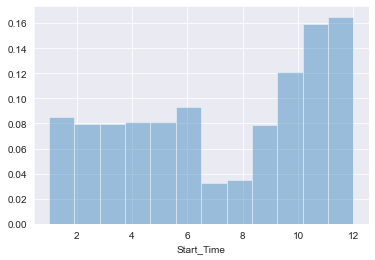

In [80]:
df_2020 = df[df.Start_Time.dt.year == 2020]
sns.distplot(df_2020.Start_Time.dt.month,bins = 12, kde = False, norm_hist = True)


<AxesSubplot:xlabel='Start_Time'>

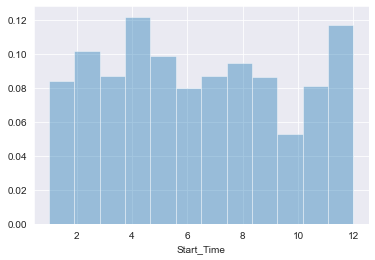

In [82]:
df_2022 = df[df.Start_Time.dt.year == 2022]
sns.distplot(df_2022.Start_Time.dt.month,bins = 12, kde = False, norm_hist = True)
#more balanced



### 25. What was trend of accidents in 2016? 



C:\Users\Khola Shams\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

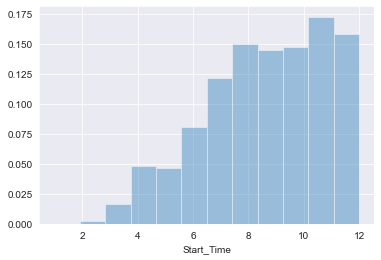

In [221]:
df_2016 = df[df.Start_Time.dt.year == 2016]
sns.distplot(df_2016.Start_Time.dt.month,bins = 12, kde = False, norm_hist = True)

The data is missing for 2016 thus the january accident are not showing, however, other than that, the 2016 data shows an increase in accidents over the month

### 26. What was trend of accidents in 2019?

<AxesSubplot:xlabel='Start_Time'>

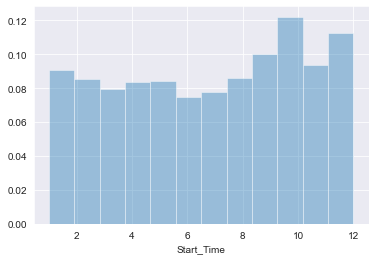

In [85]:
df_2019 = df[df.Start_Time.dt.year == 2019]
sns.distplot(df_2019.Start_Time.dt.month,bins = 12, kde = False, norm_hist = True)


the trend of accidents in 2019 over the  months is quite balanced, the winter months are higher but its not as high as the entire trend

### 27. Which source is provind better data for 2019?

In [93]:
df.Source 

0          Source2
1          Source2
2          Source2
3          Source2
4          Source2
            ...   
7728389    Source1
7728390    Source1
7728391    Source1
7728392    Source1
7728393    Source1
Name: Source, Length: 7728394, dtype: object

<AxesSubplot:xlabel='Start_Time'>

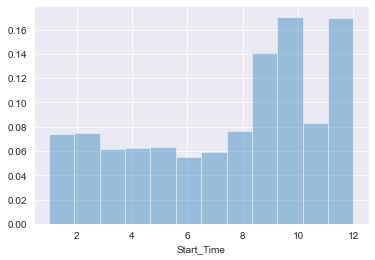

In [95]:
df_2019 = df[df.Start_Time.dt.year == 2019]
df_2019_Bing = df_2019[df_2019.Source == 'Source1']
sns.distplot(df_2019_Bing.Start_Time.dt.month,bins = 12, kde = False, norm_hist = True)


source 1 shows higher count for december

<AxesSubplot:xlabel='Start_Time'>

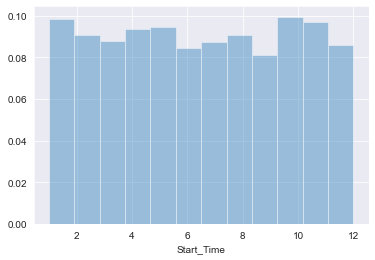

In [96]:
df_2019 = df[df.Start_Time.dt.year == 2019]
df_2019_Bing = df_2019[df_2019.Source == 'Source2']
sns.distplot(df_2019_Bing.Start_Time.dt.month,bins = 12, kde = False, norm_hist = True)


source 2 shows pretty balanced data

their seems to be some issue with the source1 data thus, it is unreliable for now

<AxesSubplot:ylabel='Source'>

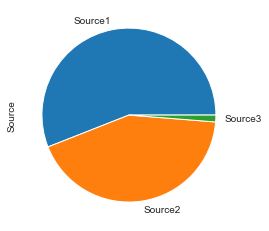

In [101]:
df.Source.value_counts().plot(kind = 'pie')

most data is from source1 which is not correct so we would consider excluding source 1 data seems to have issues, can cause wrong analyis

### Start_Lat, Start_Lng

In [102]:
df.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
7728389    34.002480
7728390    32.766960
7728391    33.775450
7728392    33.992460
7728393    34.133930
Name: Start_Lat, Length: 7728394, dtype: float64

In [108]:
df.Start_Lng

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
7728389   -117.379360
7728390   -117.148060
7728391   -117.847790
7728392   -118.403020
7728393   -117.230920
Name: Start_Lng, Length: 7728394, dtype: float64

In [110]:
sample_df = df.sample(int(0.1 * len(df)))


### 28. What is the distribution of accidents on the basis of Lat and Lon?

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

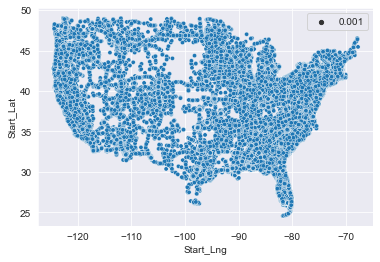

In [111]:
sns.scatterplot(x=sample_df.Start_Lng,y=sample_df.Start_Lat,size=0.001)

the plot shows density among the cost where most of the population is living and less density in the middle where less population resides

### 29. Does New York show up in the data? If yes, why is the count of accidents lower in the most populated city in the US? 

In [180]:
'New York'  in df.City


False

In [181]:
'NY'  in df.State

False

In [ ]:
## summary and conclusions